# Downloading Weather Data for AIrports

This notebook primarily serves to create and debug newer functions acround gathering the weather sensor
data from airports.

This relies on gathering data info, converting airport codes, keeping larger airports,
and downloading the correct files from NOAA's FTP servers.

This includes the downloads of the data.
    - have a list of airports in the USA, with WBAN and ICAO and USAF codes
    - that list an be used to download weather station data for a subset of airports in large cities.
    - Download the data from NOAA's FTP servers.

In [23]:
import pandas as pd

In [24]:
import os
import sys

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# candidate for ipython startup
import sys

CODE_PATHS = ['/tf/us_elec', '/tf']

for cp in CODE_PATHS:
    if cp not in sys.path:
        sys.path.append(cp)


In [ ]:
from us_elec.util.get_weather_data import (make_airport_df, read_isd_df, 
                                           merge_air_isd, plot_airports, get_all_data, convert_state_isd)

In [ ]:
# candidate for ipython startup
%load_ext autoreload
%autoreload 2

In [ ]:
%pdb off
air_df = make_airport_df()

In [ ]:
#air_df

In [ ]:
import matplotlib as mpl
mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "blue"})
#mpl.rcParams['text.color'] = 'white'
#mpl.rcParams['axes.labelcolor'] = 'white'

First up, let's load in the dataframe of weather stations at airports.

In [ ]:
isd_df = read_isd_df()

In [ ]:
#isd_df

In [ ]:
merge_df = merge_air_isd(air_df, isd_df)

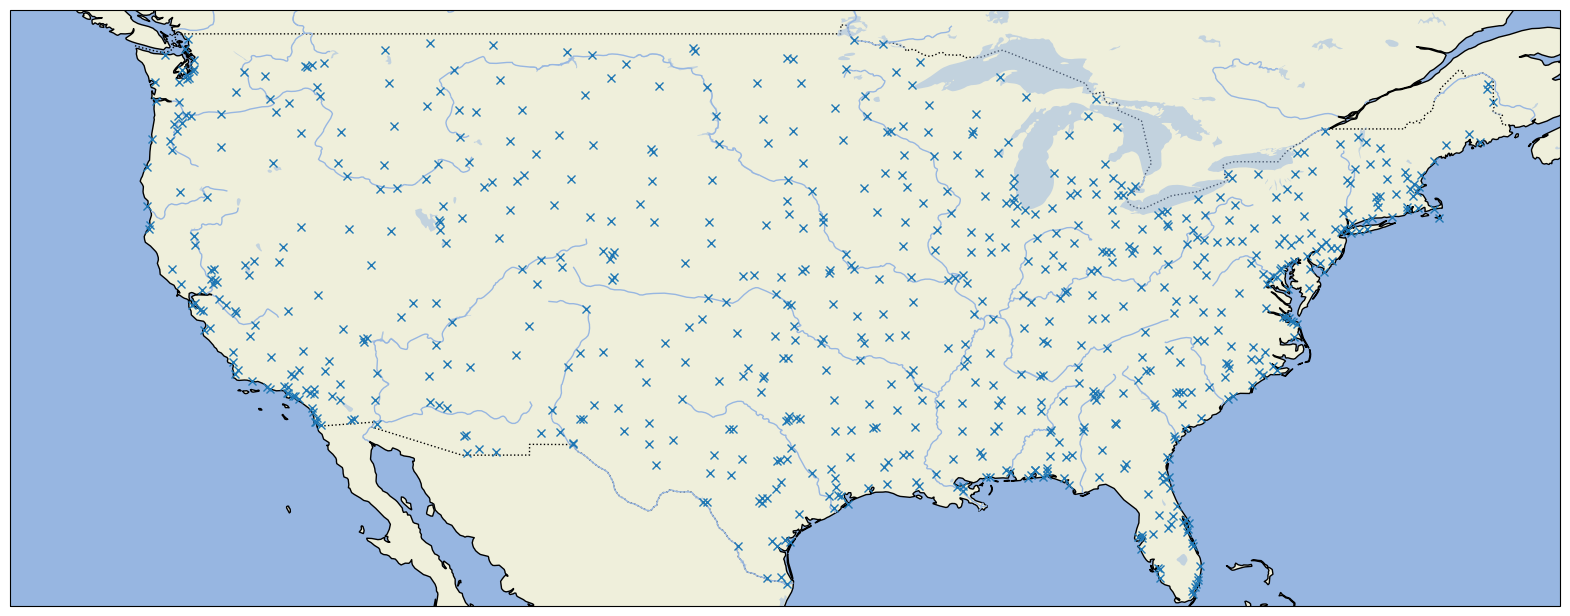

In [25]:
plot_airports(merge_df)


In [ ]:
merge_df.to_csv('/tf/data/air_merge_df.csv.gz')

## Downloading the Data

The next utilities then download the data from NOAA's FTP server using the merge_df lookup to find the
correct file path.
The ISD is a preprocessed lighter dataset that has been cleaned to handle anomalies (missing data, dupes)
with regular hourly resolution for each station.

The data are saved at `https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/<year>/<USAF>-<WBAN>-<YEAR>.gz`


In [50]:
# Note: very slow. 
%pdb off
#get_all_data(merge_df.iloc[:2], 2020, 2023)

Automatic pdb calling has been turned OFF


In [47]:
from us_elec.util.get_weather_data import get_all_data_http

In [58]:
# get data for all stations from 2020 to 2023 (Mar 8).
# Around 12 min per year
get_all_data_http(merge_df, 2023, 2024)

  0%|          | 0/844 [00:00<?, ?it/s]

  0%|          | 1/844 [00:00<09:40,  1.45it/s]

  0%|          | 2/844 [00:01<09:03,  1.55it/s]

  0%|          | 3/844 [00:02<09:31,  1.47it/s]

  0%|          | 4/844 [00:02<10:55,  1.28it/s]

  1%|          | 5/844 [00:03<11:00,  1.27it/s]

  1%|          | 6/844 [00:04<11:38,  1.20it/s]

  1%|          | 7/844 [00:05<11:57,  1.17it/s]

  1%|          | 8/844 [00:06<12:29,  1.12it/s]

  1%|          | 9/844 [00:07<11:30,  1.21it/s]

  1%|          | 10/844 [00:07<11:01,  1.26it/s]

  1%|▏         | 11/844 [00:08<10:40,  1.30it/s]

  1%|▏         | 12/844 [00:09<11:19,  1.22it/s]

  2%|▏         | 13/844 [00:10<10:54,  1.27it/s]

  2%|▏         | 14/844 [00:11<11:20,  1.22it/s]

  2%|▏         | 15/844 [00:12<11:58,  1.15it/s]

  2%|▏         | 16/844 [00:13<11:48,  1.17it/s]

  2%|▏         | 17/844 [00:13<11:40,  1.18it/s]

  2%|▏         | 18/844 [00:14<11:34,  1.19it/s]

  2%|▏         | 19/844 [00:15<10:48,  1.27it/s]

  2%|▏         | 20/844 [00:16<10:51,  1.27it/s]

  2%|▏         | 21/844 [00:16<11:00,  1.25it/s]

  3%|▎         | 22/844 [00:17<10:40,  1.28it/s]

  3%|▎         | 23/844 [00:18<11:09,  1.23it/s]

  3%|▎         | 24/844 [00:19<11:16,  1.21it/s]

  3%|▎         | 25/844 [00:20<12:03,  1.13it/s]

  3%|▎         | 26/844 [00:21<12:05,  1.13it/s]

  3%|▎         | 27/844 [00:22<11:53,  1.14it/s]

  3%|▎         | 28/844 [00:23<11:58,  1.14it/s]

  3%|▎         | 29/844 [00:23<10:58,  1.24it/s]

  4%|▎         | 30/844 [00:24<11:24,  1.19it/s]

  4%|▎         | 31/844 [00:25<10:30,  1.29it/s]

  4%|▍         | 32/844 [00:26<10:55,  1.24it/s]

  4%|▍         | 33/844 [00:26<10:46,  1.26it/s]

  4%|▍         | 34/844 [00:28<12:02,  1.12it/s]

  4%|▍         | 35/844 [00:28<12:02,  1.12it/s]

  4%|▍         | 36/844 [00:29<11:50,  1.14it/s]

  4%|▍         | 37/844 [00:30<11:46,  1.14it/s]

  5%|▍         | 38/844 [00:31<12:08,  1.11it/s]

  5%|▍         | 39/844 [00:32<11:22,  1.18it/s]

  5%|▍         | 40/844 [00:33<11:31,  1.16it/s]

  5%|▍         | 41/844 [00:33<10:39,  1.26it/s]

  5%|▍         | 42/844 [00:34<09:54,  1.35it/s]

  5%|▌         | 43/844 [00:35<10:06,  1.32it/s]

  5%|▌         | 44/844 [00:36<10:02,  1.33it/s]

  5%|▌         | 45/844 [00:36<10:17,  1.29it/s]

  5%|▌         | 46/844 [00:37<10:16,  1.29it/s]

  6%|▌         | 47/844 [00:38<10:16,  1.29it/s]

  6%|▌         | 48/844 [00:39<10:38,  1.25it/s]

  6%|▌         | 49/844 [00:40<10:55,  1.21it/s]

  6%|▌         | 50/844 [00:40<10:38,  1.24it/s]

  6%|▌         | 51/844 [00:41<10:03,  1.31it/s]

  6%|▌         | 52/844 [00:42<10:15,  1.29it/s]

  6%|▋         | 53/844 [00:43<10:46,  1.22it/s]

  6%|▋         | 54/844 [00:44<10:25,  1.26it/s]

  7%|▋         | 55/844 [00:44<10:06,  1.30it/s]

  7%|▋         | 56/844 [00:45<11:06,  1.18it/s]

  7%|▋         | 57/844 [00:46<10:35,  1.24it/s]

  7%|▋         | 58/844 [00:47<12:13,  1.07it/s]

  7%|▋         | 59/844 [00:48<11:21,  1.15it/s]

  7%|▋         | 60/844 [00:49<11:08,  1.17it/s]

  7%|▋         | 61/844 [00:50<11:00,  1.19it/s]

  7%|▋         | 62/844 [00:50<11:10,  1.17it/s]

  7%|▋         | 63/844 [00:51<11:08,  1.17it/s]

  8%|▊         | 64/844 [00:52<11:20,  1.15it/s]

  8%|▊         | 65/844 [00:53<11:33,  1.12it/s]

  8%|▊         | 66/844 [00:54<10:52,  1.19it/s]

  8%|▊         | 67/844 [00:55<10:23,  1.25it/s]

  8%|▊         | 68/844 [00:55<10:02,  1.29it/s]

  8%|▊         | 69/844 [00:56<10:36,  1.22it/s]

  8%|▊         | 70/844 [00:57<10:11,  1.27it/s]

  8%|▊         | 71/844 [00:58<09:30,  1.36it/s]

  9%|▊         | 72/844 [00:58<09:54,  1.30it/s]

  9%|▊         | 73/844 [00:59<09:57,  1.29it/s]

  9%|▉         | 74/844 [01:00<09:45,  1.31it/s]

  9%|▉         | 75/844 [01:01<09:56,  1.29it/s]

  9%|▉         | 76/844 [01:02<10:22,  1.23it/s]

  9%|▉         | 77/844 [01:02<09:42,  1.32it/s]

  9%|▉         | 78/844 [01:03<09:32,  1.34it/s]

  9%|▉         | 79/844 [01:04<10:33,  1.21it/s]

  9%|▉         | 80/844 [01:05<10:08,  1.25it/s]

 10%|▉         | 81/844 [01:06<10:28,  1.21it/s]

 10%|▉         | 82/844 [01:06<10:11,  1.25it/s]

 10%|▉         | 83/844 [01:07<09:46,  1.30it/s]

 10%|▉         | 84/844 [01:08<10:20,  1.22it/s]

 10%|█         | 85/844 [01:09<10:45,  1.18it/s]

 10%|█         | 86/844 [01:10<10:16,  1.23it/s]

 10%|█         | 87/844 [01:11<10:37,  1.19it/s]

 10%|█         | 88/844 [01:11<10:49,  1.16it/s]

 11%|█         | 89/844 [01:12<10:00,  1.26it/s]

 11%|█         | 90/844 [01:13<09:42,  1.30it/s]

 11%|█         | 91/844 [01:14<10:08,  1.24it/s]

 11%|█         | 92/844 [01:14<09:53,  1.27it/s]

 11%|█         | 93/844 [01:15<10:14,  1.22it/s]

 11%|█         | 94/844 [01:16<09:36,  1.30it/s]

 11%|█▏        | 95/844 [01:17<10:01,  1.25it/s]

 11%|█▏        | 96/844 [01:18<10:36,  1.17it/s]

 11%|█▏        | 97/844 [01:19<10:04,  1.24it/s]

 12%|█▏        | 98/844 [01:19<09:52,  1.26it/s]

 12%|█▏        | 99/844 [01:20<08:40,  1.43it/s]

 12%|█▏        | 100/844 [01:21<09:18,  1.33it/s]

 12%|█▏        | 101/844 [01:21<09:23,  1.32it/s]

 12%|█▏        | 102/844 [01:22<08:48,  1.40it/s]

 12%|█▏        | 103/844 [01:23<08:48,  1.40it/s]

 12%|█▏        | 104/844 [01:23<08:24,  1.47it/s]

 12%|█▏        | 105/844 [01:24<08:31,  1.44it/s]

 13%|█▎        | 106/844 [01:25<09:22,  1.31it/s]

 13%|█▎        | 107/844 [01:26<09:33,  1.28it/s]

 13%|█▎        | 108/844 [01:27<09:41,  1.26it/s]

 13%|█▎        | 109/844 [01:27<09:25,  1.30it/s]

 13%|█▎        | 110/844 [01:28<09:58,  1.23it/s]

 13%|█▎        | 111/844 [01:29<09:50,  1.24it/s]

 13%|█▎        | 112/844 [01:30<09:41,  1.26it/s]

 13%|█▎        | 113/844 [01:31<09:30,  1.28it/s]

 14%|█▎        | 114/844 [01:31<09:32,  1.27it/s]

 14%|█▎        | 115/844 [01:32<09:11,  1.32it/s]

 14%|█▎        | 116/844 [01:33<09:05,  1.33it/s]

 14%|█▍        | 117/844 [01:33<08:53,  1.36it/s]

 14%|█▍        | 118/844 [01:34<08:28,  1.43it/s]

 14%|█▍        | 119/844 [01:35<09:05,  1.33it/s]

 14%|█▍        | 120/844 [01:36<08:43,  1.38it/s]

 14%|█▍        | 121/844 [01:37<09:18,  1.29it/s]

 14%|█▍        | 122/844 [01:37<10:00,  1.20it/s]

 15%|█▍        | 123/844 [01:38<09:10,  1.31it/s]

 15%|█▍        | 124/844 [01:39<08:40,  1.38it/s]

 15%|█▍        | 125/844 [01:39<08:13,  1.46it/s]

 15%|█▍        | 126/844 [01:40<09:07,  1.31it/s]

 15%|█▌        | 127/844 [01:41<09:24,  1.27it/s]

 15%|█▌        | 128/844 [01:42<09:20,  1.28it/s]

 15%|█▌        | 129/844 [01:43<09:49,  1.21it/s]

 15%|█▌        | 130/844 [01:44<09:25,  1.26it/s]

 16%|█▌        | 131/844 [01:44<09:45,  1.22it/s]

 16%|█▌        | 132/844 [01:45<09:36,  1.24it/s]

 16%|█▌        | 133/844 [01:46<09:08,  1.30it/s]

 16%|█▌        | 134/844 [01:47<09:34,  1.24it/s]

 16%|█▌        | 135/844 [01:48<09:23,  1.26it/s]

 16%|█▌        | 136/844 [01:48<09:14,  1.28it/s]

 16%|█▌        | 137/844 [01:49<08:47,  1.34it/s]

 16%|█▋        | 138/844 [01:50<09:02,  1.30it/s]

 16%|█▋        | 139/844 [01:51<09:12,  1.28it/s]

 17%|█▋        | 140/844 [01:52<09:41,  1.21it/s]

 17%|█▋        | 141/844 [01:52<09:16,  1.26it/s]

 17%|█▋        | 142/844 [01:53<08:59,  1.30it/s]

 17%|█▋        | 143/844 [01:54<09:27,  1.24it/s]

 17%|█▋        | 144/844 [01:54<08:50,  1.32it/s]

 17%|█▋        | 145/844 [01:55<09:15,  1.26it/s]

 17%|█▋        | 146/844 [01:56<09:10,  1.27it/s]

 17%|█▋        | 147/844 [01:57<08:50,  1.31it/s]

 18%|█▊        | 148/844 [01:58<08:42,  1.33it/s]

 18%|█▊        | 149/844 [01:58<08:32,  1.36it/s]

 18%|█▊        | 150/844 [01:59<08:47,  1.31it/s]

 18%|█▊        | 151/844 [02:00<08:22,  1.38it/s]

 18%|█▊        | 152/844 [02:00<08:27,  1.36it/s]

 18%|█▊        | 153/844 [02:01<08:38,  1.33it/s]

 18%|█▊        | 154/844 [02:02<08:04,  1.42it/s]

 18%|█▊        | 155/844 [02:03<08:39,  1.33it/s]

 18%|█▊        | 156/844 [02:03<08:18,  1.38it/s]

 19%|█▊        | 157/844 [02:04<08:54,  1.29it/s]

 19%|█▊        | 158/844 [02:05<09:28,  1.21it/s]

 19%|█▉        | 159/844 [02:06<09:25,  1.21it/s]

 19%|█▉        | 160/844 [02:07<09:01,  1.26it/s]

 19%|█▉        | 161/844 [02:07<08:45,  1.30it/s]

 19%|█▉        | 162/844 [02:08<08:47,  1.29it/s]

 19%|█▉        | 163/844 [02:09<08:21,  1.36it/s]

 19%|█▉        | 164/844 [02:10<08:17,  1.37it/s]

 20%|█▉        | 165/844 [02:10<08:24,  1.35it/s]

 20%|█▉        | 166/844 [02:11<08:06,  1.39it/s]

 20%|█▉        | 167/844 [02:12<08:43,  1.29it/s]

 20%|█▉        | 168/844 [02:13<08:35,  1.31it/s]

 20%|██        | 169/844 [02:14<09:01,  1.25it/s]

 20%|██        | 170/844 [02:14<09:09,  1.23it/s]

 20%|██        | 171/844 [02:15<09:24,  1.19it/s]

 20%|██        | 172/844 [02:16<09:04,  1.23it/s]

 20%|██        | 173/844 [02:17<08:45,  1.28it/s]

 21%|██        | 174/844 [02:18<09:05,  1.23it/s]

 21%|██        | 175/844 [02:18<08:58,  1.24it/s]

 21%|██        | 176/844 [02:19<08:54,  1.25it/s]

 21%|██        | 177/844 [02:20<09:10,  1.21it/s]

 21%|██        | 178/844 [02:21<08:57,  1.24it/s]

 21%|██        | 179/844 [02:22<09:37,  1.15it/s]

 21%|██▏       | 180/844 [02:23<09:47,  1.13it/s]

 21%|██▏       | 181/844 [02:24<09:50,  1.12it/s]

 22%|██▏       | 182/844 [02:24<08:58,  1.23it/s]

 22%|██▏       | 183/844 [02:25<08:37,  1.28it/s]

 22%|██▏       | 184/844 [02:26<08:56,  1.23it/s]

 22%|██▏       | 185/844 [02:27<09:04,  1.21it/s]

 22%|██▏       | 186/844 [02:28<09:15,  1.18it/s]

 22%|██▏       | 187/844 [02:28<08:36,  1.27it/s]

 22%|██▏       | 188/844 [02:29<08:59,  1.22it/s]

 22%|██▏       | 189/844 [02:30<08:20,  1.31it/s]

 23%|██▎       | 190/844 [02:31<08:48,  1.24it/s]

 23%|██▎       | 191/844 [02:32<08:34,  1.27it/s]

 23%|██▎       | 192/844 [02:32<08:02,  1.35it/s]

 23%|██▎       | 193/844 [02:33<07:35,  1.43it/s]

 23%|██▎       | 194/844 [02:33<07:36,  1.42it/s]

 23%|██▎       | 195/844 [02:34<07:50,  1.38it/s]

 23%|██▎       | 196/844 [02:35<08:35,  1.26it/s]

 23%|██▎       | 197/844 [02:36<07:59,  1.35it/s]

 23%|██▎       | 198/844 [02:37<08:24,  1.28it/s]

 24%|██▎       | 199/844 [02:37<07:59,  1.35it/s]

 24%|██▎       | 200/844 [02:38<07:54,  1.36it/s]

 24%|██▍       | 201/844 [02:39<07:49,  1.37it/s]

 24%|██▍       | 202/844 [02:40<08:18,  1.29it/s]

 24%|██▍       | 203/844 [02:40<08:09,  1.31it/s]

 24%|██▍       | 204/844 [02:41<08:42,  1.22it/s]

 24%|██▍       | 205/844 [02:42<08:38,  1.23it/s]

 24%|██▍       | 206/844 [02:43<08:43,  1.22it/s]

 25%|██▍       | 207/844 [02:44<08:42,  1.22it/s]

 25%|██▍       | 208/844 [02:45<08:55,  1.19it/s]

 25%|██▍       | 209/844 [02:45<08:40,  1.22it/s]

 25%|██▍       | 210/844 [02:46<08:54,  1.19it/s]

 25%|██▌       | 211/844 [02:47<09:02,  1.17it/s]

 25%|██▌       | 212/844 [02:48<08:21,  1.26it/s]

 25%|██▌       | 213/844 [02:49<08:11,  1.28it/s]

 25%|██▌       | 214/844 [02:49<08:13,  1.28it/s]

 25%|██▌       | 215/844 [02:50<08:32,  1.23it/s]

 26%|██▌       | 216/844 [02:51<07:59,  1.31it/s]

 26%|██▌       | 217/844 [02:52<08:28,  1.23it/s]

 26%|██▌       | 218/844 [02:53<08:09,  1.28it/s]

 26%|██▌       | 219/844 [02:53<08:11,  1.27it/s]

 26%|██▌       | 220/844 [02:54<07:43,  1.35it/s]

 26%|██▌       | 221/844 [02:55<08:16,  1.26it/s]

 26%|██▋       | 222/844 [02:56<08:00,  1.29it/s]

 26%|██▋       | 223/844 [02:57<08:20,  1.24it/s]

 27%|██▋       | 224/844 [02:57<08:15,  1.25it/s]

 27%|██▋       | 225/844 [02:58<07:54,  1.31it/s]

 27%|██▋       | 226/844 [02:59<08:03,  1.28it/s]

 27%|██▋       | 227/844 [03:00<08:21,  1.23it/s]

 27%|██▋       | 228/844 [03:01<08:09,  1.26it/s]

 27%|██▋       | 229/844 [03:01<08:32,  1.20it/s]

 27%|██▋       | 230/844 [03:02<08:10,  1.25it/s]

 27%|██▋       | 231/844 [03:03<08:28,  1.21it/s]

 27%|██▋       | 232/844 [03:04<08:29,  1.20it/s]

 28%|██▊       | 233/844 [03:05<07:49,  1.30it/s]

 28%|██▊       | 234/844 [03:05<08:12,  1.24it/s]

 28%|██▊       | 235/844 [03:06<08:31,  1.19it/s]

 28%|██▊       | 236/844 [03:07<07:53,  1.28it/s]

 28%|██▊       | 237/844 [03:08<08:18,  1.22it/s]

 28%|██▊       | 238/844 [03:09<08:36,  1.17it/s]

 28%|██▊       | 239/844 [03:10<08:40,  1.16it/s]

 28%|██▊       | 240/844 [03:11<08:57,  1.12it/s]

 29%|██▊       | 241/844 [03:12<08:59,  1.12it/s]

 29%|██▊       | 242/844 [03:12<09:03,  1.11it/s]

 29%|██▉       | 243/844 [03:13<09:08,  1.10it/s]

 29%|██▉       | 244/844 [03:14<08:44,  1.14it/s]

 29%|██▉       | 245/844 [03:15<08:31,  1.17it/s]

 29%|██▉       | 246/844 [03:16<08:33,  1.16it/s]

 29%|██▉       | 247/844 [03:17<08:39,  1.15it/s]

 29%|██▉       | 248/844 [03:18<08:22,  1.19it/s]

 30%|██▉       | 249/844 [03:18<08:17,  1.20it/s]

 30%|██▉       | 250/844 [03:19<08:14,  1.20it/s]

 30%|██▉       | 251/844 [03:20<08:21,  1.18it/s]

 30%|██▉       | 252/844 [03:21<08:30,  1.16it/s]

 30%|██▉       | 253/844 [03:22<08:08,  1.21it/s]

 30%|███       | 254/844 [03:23<09:00,  1.09it/s]

 30%|███       | 255/844 [03:24<08:52,  1.11it/s]

 30%|███       | 256/844 [03:24<08:07,  1.21it/s]

 30%|███       | 257/844 [03:25<07:47,  1.25it/s]

 31%|███       | 258/844 [03:26<08:03,  1.21it/s]

 31%|███       | 259/844 [03:27<08:23,  1.16it/s]

 31%|███       | 260/844 [03:28<08:34,  1.14it/s]

 31%|███       | 261/844 [03:29<08:33,  1.13it/s]

 31%|███       | 262/844 [03:29<07:35,  1.28it/s]

 31%|███       | 263/844 [03:30<07:52,  1.23it/s]

 31%|███▏      | 264/844 [03:31<07:15,  1.33it/s]

 31%|███▏      | 265/844 [03:31<06:58,  1.38it/s]

 32%|███▏      | 266/844 [03:32<07:27,  1.29it/s]

 32%|███▏      | 267/844 [03:33<07:03,  1.36it/s]

 32%|███▏      | 268/844 [03:34<06:43,  1.43it/s]

 32%|███▏      | 269/844 [03:34<07:02,  1.36it/s]

 32%|███▏      | 270/844 [03:35<06:58,  1.37it/s]

 32%|███▏      | 271/844 [03:36<06:55,  1.38it/s]

 32%|███▏      | 272/844 [03:37<06:53,  1.38it/s]

 32%|███▏      | 273/844 [03:37<06:51,  1.39it/s]

 32%|███▏      | 274/844 [03:38<06:32,  1.45it/s]

 33%|███▎      | 275/844 [03:39<06:42,  1.42it/s]

 33%|███▎      | 276/844 [03:39<07:01,  1.35it/s]

 33%|███▎      | 277/844 [03:40<07:11,  1.31it/s]

 33%|███▎      | 278/844 [03:41<07:24,  1.27it/s]

 33%|███▎      | 279/844 [03:42<07:26,  1.27it/s]

 33%|███▎      | 280/844 [03:43<07:33,  1.24it/s]

 33%|███▎      | 281/844 [03:43<06:53,  1.36it/s]

 33%|███▎      | 282/844 [03:44<07:20,  1.28it/s]

 34%|███▎      | 283/844 [03:45<07:45,  1.21it/s]

 34%|███▎      | 284/844 [03:46<07:43,  1.21it/s]

 34%|███▍      | 285/844 [03:47<07:38,  1.22it/s]

 34%|███▍      | 286/844 [03:48<07:23,  1.26it/s]

 34%|███▍      | 287/844 [03:48<07:40,  1.21it/s]

 34%|███▍      | 288/844 [03:49<08:02,  1.15it/s]

 34%|███▍      | 289/844 [03:50<07:57,  1.16it/s]

 34%|███▍      | 290/844 [03:51<07:28,  1.23it/s]

 34%|███▍      | 291/844 [03:52<07:19,  1.26it/s]

 35%|███▍      | 292/844 [03:53<07:47,  1.18it/s]

 35%|███▍      | 293/844 [03:54<07:50,  1.17it/s]

 35%|███▍      | 294/844 [03:54<07:16,  1.26it/s]

 35%|███▍      | 295/844 [03:55<07:03,  1.30it/s]

 35%|███▌      | 296/844 [03:56<07:23,  1.23it/s]

 35%|███▌      | 297/844 [03:57<07:16,  1.25it/s]

 35%|███▌      | 298/844 [03:57<06:57,  1.31it/s]

 35%|███▌      | 299/844 [03:58<06:32,  1.39it/s]

 36%|███▌      | 300/844 [03:59<06:47,  1.34it/s]

 36%|███▌      | 301/844 [04:00<07:10,  1.26it/s]

 36%|███▌      | 302/844 [04:00<07:07,  1.27it/s]

 36%|███▌      | 303/844 [04:01<06:49,  1.32it/s]

 36%|███▌      | 304/844 [04:02<07:09,  1.26it/s]

 36%|███▌      | 305/844 [04:03<07:08,  1.26it/s]

 36%|███▋      | 306/844 [04:04<07:10,  1.25it/s]

 36%|███▋      | 307/844 [04:04<07:11,  1.24it/s]

 36%|███▋      | 308/844 [04:05<06:52,  1.30it/s]

 37%|███▋      | 309/844 [04:06<07:10,  1.24it/s]

 37%|███▋      | 310/844 [04:07<07:05,  1.26it/s]

 37%|███▋      | 311/844 [04:08<08:09,  1.09it/s]

 37%|███▋      | 312/844 [04:09<08:03,  1.10it/s]

 37%|███▋      | 313/844 [04:10<07:41,  1.15it/s]

 37%|███▋      | 314/844 [04:10<06:56,  1.27it/s]

 37%|███▋      | 315/844 [04:11<07:03,  1.25it/s]

 37%|███▋      | 316/844 [04:12<06:39,  1.32it/s]

 38%|███▊      | 317/844 [04:12<06:39,  1.32it/s]

 38%|███▊      | 318/844 [04:13<06:15,  1.40it/s]

 38%|███▊      | 319/844 [04:14<06:00,  1.46it/s]

 38%|███▊      | 320/844 [04:15<06:29,  1.35it/s]

 38%|███▊      | 321/844 [04:15<06:14,  1.40it/s]

 38%|███▊      | 322/844 [04:16<06:14,  1.39it/s]

 38%|███▊      | 323/844 [04:17<06:14,  1.39it/s]

 38%|███▊      | 324/844 [04:17<06:19,  1.37it/s]

 39%|███▊      | 325/844 [04:18<07:13,  1.20it/s]

 39%|███▊      | 326/844 [04:19<06:41,  1.29it/s]

 39%|███▊      | 327/844 [04:20<06:51,  1.26it/s]

 39%|███▉      | 328/844 [04:21<06:35,  1.31it/s]

 39%|███▉      | 329/844 [04:21<06:43,  1.28it/s]

 39%|███▉      | 330/844 [04:22<06:36,  1.30it/s]

 39%|███▉      | 331/844 [04:23<06:37,  1.29it/s]

 39%|███▉      | 332/844 [04:24<06:48,  1.25it/s]

 39%|███▉      | 333/844 [04:25<06:47,  1.26it/s]

 40%|███▉      | 334/844 [04:25<06:45,  1.26it/s]

 40%|███▉      | 335/844 [04:26<06:32,  1.30it/s]

 40%|███▉      | 336/844 [04:27<06:49,  1.24it/s]

 40%|███▉      | 337/844 [04:28<06:40,  1.27it/s]

 40%|████      | 338/844 [04:29<06:56,  1.22it/s]

 40%|████      | 339/844 [04:29<06:43,  1.25it/s]

 40%|████      | 340/844 [04:30<06:48,  1.23it/s]

 40%|████      | 341/844 [04:31<06:46,  1.24it/s]

 41%|████      | 342/844 [04:32<06:59,  1.20it/s]

 41%|████      | 343/844 [04:33<07:12,  1.16it/s]

 41%|████      | 344/844 [04:34<06:36,  1.26it/s]

 41%|████      | 345/844 [04:34<06:23,  1.30it/s]

 41%|████      | 346/844 [04:35<06:30,  1.28it/s]

 41%|████      | 347/844 [04:36<06:46,  1.22it/s]

 41%|████      | 348/844 [04:37<06:34,  1.26it/s]

 41%|████▏     | 349/844 [04:38<06:49,  1.21it/s]

 41%|████▏     | 350/844 [04:39<07:03,  1.17it/s]

 42%|████▏     | 351/844 [04:39<06:43,  1.22it/s]

 42%|████▏     | 352/844 [04:40<06:28,  1.27it/s]

 42%|████▏     | 353/844 [04:41<06:40,  1.23it/s]

 42%|████▏     | 354/844 [04:42<06:31,  1.25it/s]

 42%|████▏     | 355/844 [04:42<06:44,  1.21it/s]

 42%|████▏     | 356/844 [04:43<06:40,  1.22it/s]

 42%|████▏     | 357/844 [04:44<06:15,  1.30it/s]

 42%|████▏     | 358/844 [04:45<05:51,  1.38it/s]

 43%|████▎     | 359/844 [04:45<05:41,  1.42it/s]

 43%|████▎     | 360/844 [04:46<05:36,  1.44it/s]

 43%|████▎     | 361/844 [04:47<05:38,  1.43it/s]

 43%|████▎     | 362/844 [04:48<06:10,  1.30it/s]

 43%|████▎     | 363/844 [04:48<06:25,  1.25it/s]

 43%|████▎     | 364/844 [04:49<06:22,  1.25it/s]

 43%|████▎     | 365/844 [04:50<06:05,  1.31it/s]

 43%|████▎     | 366/844 [04:51<06:09,  1.29it/s]

 43%|████▎     | 367/844 [04:51<05:49,  1.36it/s]

 44%|████▎     | 368/844 [04:52<05:46,  1.37it/s]

 44%|████▎     | 369/844 [04:53<05:59,  1.32it/s]

 44%|████▍     | 370/844 [04:54<06:15,  1.26it/s]

 44%|████▍     | 371/844 [04:55<06:12,  1.27it/s]

 44%|████▍     | 372/844 [04:55<05:45,  1.37it/s]

 44%|████▍     | 373/844 [04:56<05:41,  1.38it/s]

 44%|████▍     | 374/844 [04:57<05:47,  1.35it/s]

 44%|████▍     | 375/844 [04:57<05:35,  1.40it/s]

 45%|████▍     | 376/844 [04:58<05:35,  1.40it/s]

 45%|████▍     | 377/844 [04:59<05:57,  1.31it/s]

 45%|████▍     | 378/844 [05:00<06:24,  1.21it/s]

 45%|████▍     | 379/844 [05:01<06:31,  1.19it/s]

 45%|████▌     | 380/844 [05:01<06:21,  1.22it/s]

 45%|████▌     | 381/844 [05:02<06:03,  1.28it/s]

 45%|████▌     | 382/844 [05:03<06:17,  1.22it/s]

 45%|████▌     | 383/844 [05:04<06:11,  1.24it/s]

 45%|████▌     | 384/844 [05:05<06:13,  1.23it/s]

 46%|████▌     | 385/844 [05:05<06:13,  1.23it/s]

 46%|████▌     | 386/844 [05:06<06:22,  1.20it/s]

 46%|████▌     | 387/844 [05:07<06:05,  1.25it/s]

 46%|████▌     | 388/844 [05:08<06:16,  1.21it/s]

 46%|████▌     | 389/844 [05:09<05:51,  1.30it/s]

 46%|████▌     | 390/844 [05:10<06:07,  1.24it/s]

 46%|████▋     | 391/844 [05:11<06:37,  1.14it/s]

 46%|████▋     | 392/844 [05:11<06:16,  1.20it/s]

 47%|████▋     | 393/844 [05:12<06:09,  1.22it/s]

 47%|████▋     | 394/844 [05:13<06:12,  1.21it/s]

 47%|████▋     | 395/844 [05:14<05:57,  1.26it/s]

 47%|████▋     | 396/844 [05:14<05:32,  1.35it/s]

 47%|████▋     | 397/844 [05:15<05:41,  1.31it/s]

 47%|████▋     | 398/844 [05:16<05:34,  1.33it/s]

 47%|████▋     | 399/844 [05:17<05:29,  1.35it/s]

 47%|████▋     | 400/844 [05:17<05:47,  1.28it/s]

 48%|████▊     | 401/844 [05:18<05:43,  1.29it/s]

 48%|████▊     | 402/844 [05:19<06:25,  1.15it/s]

 48%|████▊     | 403/844 [05:20<05:54,  1.24it/s]

 48%|████▊     | 404/844 [05:21<06:04,  1.21it/s]

 48%|████▊     | 405/844 [05:22<05:56,  1.23it/s]

 48%|████▊     | 406/844 [05:22<05:53,  1.24it/s]

 48%|████▊     | 407/844 [05:23<05:17,  1.38it/s]

 48%|████▊     | 408/844 [05:24<05:32,  1.31it/s]

 48%|████▊     | 409/844 [05:25<06:02,  1.20it/s]

 49%|████▊     | 410/844 [05:25<05:43,  1.27it/s]

 49%|████▊     | 411/844 [05:26<05:19,  1.35it/s]

 49%|████▉     | 412/844 [05:27<05:37,  1.28it/s]

 49%|████▉     | 413/844 [05:28<05:36,  1.28it/s]

 49%|████▉     | 414/844 [05:29<05:41,  1.26it/s]

 49%|████▉     | 415/844 [05:29<05:45,  1.24it/s]

 49%|████▉     | 416/844 [05:30<05:45,  1.24it/s]

 49%|████▉     | 417/844 [05:31<05:54,  1.20it/s]

 50%|████▉     | 418/844 [05:32<06:00,  1.18it/s]

 50%|████▉     | 419/844 [05:33<05:51,  1.21it/s]

 50%|████▉     | 420/844 [05:33<05:20,  1.32it/s]

 50%|████▉     | 421/844 [05:34<05:14,  1.34it/s]

 50%|█████     | 422/844 [05:35<05:31,  1.27it/s]

 50%|█████     | 423/844 [05:36<05:31,  1.27it/s]

 50%|█████     | 424/844 [05:36<05:22,  1.30it/s]

 50%|█████     | 425/844 [05:37<05:22,  1.30it/s]

 50%|█████     | 426/844 [05:38<05:29,  1.27it/s]

 51%|█████     | 427/844 [05:39<05:37,  1.23it/s]

 51%|█████     | 428/844 [05:40<05:38,  1.23it/s]

 51%|█████     | 429/844 [05:40<05:18,  1.30it/s]

 51%|█████     | 430/844 [05:41<05:33,  1.24it/s]

 51%|█████     | 431/844 [05:42<05:24,  1.27it/s]

 51%|█████     | 432/844 [05:43<05:03,  1.36it/s]

 51%|█████▏    | 433/844 [05:44<05:20,  1.28it/s]

 51%|█████▏    | 434/844 [05:44<05:41,  1.20it/s]

 52%|█████▏    | 435/844 [05:45<05:47,  1.18it/s]

 52%|█████▏    | 436/844 [05:46<05:34,  1.22it/s]

 52%|█████▏    | 437/844 [05:47<05:08,  1.32it/s]

 52%|█████▏    | 438/844 [05:48<05:24,  1.25it/s]

 52%|█████▏    | 439/844 [05:48<05:20,  1.26it/s]

 52%|█████▏    | 440/844 [05:49<05:19,  1.26it/s]

 52%|█████▏    | 441/844 [05:50<05:09,  1.30it/s]

 52%|█████▏    | 442/844 [05:51<05:24,  1.24it/s]

 52%|█████▏    | 443/844 [05:52<05:38,  1.18it/s]

 53%|█████▎    | 444/844 [05:52<05:29,  1.21it/s]

 53%|█████▎    | 445/844 [05:53<05:10,  1.29it/s]

 53%|█████▎    | 446/844 [05:54<05:02,  1.32it/s]

 53%|█████▎    | 447/844 [05:54<04:44,  1.40it/s]

 53%|█████▎    | 448/844 [05:55<04:52,  1.35it/s]

 53%|█████▎    | 449/844 [05:56<04:40,  1.41it/s]

 53%|█████▎    | 450/844 [05:57<04:40,  1.40it/s]

 53%|█████▎    | 451/844 [05:58<04:59,  1.31it/s]

 54%|█████▎    | 452/844 [05:58<05:10,  1.26it/s]

 54%|█████▎    | 453/844 [05:59<05:00,  1.30it/s]

 54%|█████▍    | 454/844 [06:00<04:55,  1.32it/s]

 54%|█████▍    | 455/844 [06:01<04:48,  1.35it/s]

 54%|█████▍    | 456/844 [06:01<05:08,  1.26it/s]

 54%|█████▍    | 457/844 [06:02<05:19,  1.21it/s]

 54%|█████▍    | 458/844 [06:03<05:09,  1.25it/s]

 54%|█████▍    | 459/844 [06:04<05:19,  1.21it/s]

 55%|█████▍    | 460/844 [06:05<05:12,  1.23it/s]

 55%|█████▍    | 461/844 [06:06<05:16,  1.21it/s]

 55%|█████▍    | 462/844 [06:07<05:41,  1.12it/s]

 55%|█████▍    | 463/844 [06:07<05:20,  1.19it/s]

 55%|█████▍    | 464/844 [06:08<05:05,  1.24it/s]

 55%|█████▌    | 465/844 [06:09<05:14,  1.21it/s]

 55%|█████▌    | 466/844 [06:10<05:19,  1.18it/s]

 55%|█████▌    | 467/844 [06:11<05:05,  1.23it/s]

 55%|█████▌    | 468/844 [06:11<04:49,  1.30it/s]

 56%|█████▌    | 469/844 [06:12<05:02,  1.24it/s]

 56%|█████▌    | 470/844 [06:13<05:00,  1.24it/s]

 56%|█████▌    | 471/844 [06:14<04:58,  1.25it/s]

 56%|█████▌    | 472/844 [06:15<05:00,  1.24it/s]

 56%|█████▌    | 473/844 [06:15<04:56,  1.25it/s]

 56%|█████▌    | 474/844 [06:16<04:36,  1.34it/s]

 56%|█████▋    | 475/844 [06:17<04:42,  1.30it/s]

 56%|█████▋    | 476/844 [06:18<04:36,  1.33it/s]

 57%|█████▋    | 477/844 [06:18<04:32,  1.35it/s]

 57%|█████▋    | 478/844 [06:19<04:38,  1.31it/s]

 57%|█████▋    | 479/844 [06:20<04:34,  1.33it/s]

 57%|█████▋    | 480/844 [06:21<04:39,  1.30it/s]

 57%|█████▋    | 481/844 [06:22<04:55,  1.23it/s]

 57%|█████▋    | 482/844 [06:22<04:34,  1.32it/s]

 57%|█████▋    | 483/844 [06:23<04:46,  1.26it/s]

 57%|█████▋    | 484/844 [06:24<04:53,  1.23it/s]

 57%|█████▋    | 485/844 [06:25<04:59,  1.20it/s]

 58%|█████▊    | 486/844 [06:25<04:39,  1.28it/s]

 58%|█████▊    | 487/844 [06:26<04:51,  1.22it/s]

 58%|█████▊    | 488/844 [06:27<05:02,  1.18it/s]

 58%|█████▊    | 489/844 [06:28<04:49,  1.23it/s]

 58%|█████▊    | 490/844 [06:29<04:45,  1.24it/s]

 58%|█████▊    | 491/844 [06:29<04:27,  1.32it/s]

 58%|█████▊    | 492/844 [06:30<04:22,  1.34it/s]

 58%|█████▊    | 493/844 [06:31<04:26,  1.32it/s]

 59%|█████▊    | 494/844 [06:32<04:16,  1.36it/s]

 59%|█████▊    | 495/844 [06:32<04:10,  1.39it/s]

 59%|█████▉    | 496/844 [06:33<03:59,  1.45it/s]

 59%|█████▉    | 497/844 [06:34<04:07,  1.40it/s]

 59%|█████▉    | 498/844 [06:34<03:51,  1.50it/s]

 59%|█████▉    | 499/844 [06:35<04:12,  1.37it/s]

 59%|█████▉    | 500/844 [06:36<04:13,  1.36it/s]

 59%|█████▉    | 501/844 [06:36<04:00,  1.42it/s]

 59%|█████▉    | 502/844 [06:37<04:22,  1.30it/s]

 60%|█████▉    | 503/844 [06:38<04:40,  1.22it/s]

 60%|█████▉    | 504/844 [06:39<04:39,  1.22it/s]

 60%|█████▉    | 505/844 [06:40<04:39,  1.21it/s]

 60%|█████▉    | 506/844 [06:41<04:36,  1.22it/s]

 60%|██████    | 507/844 [06:42<04:30,  1.24it/s]

 60%|██████    | 508/844 [06:42<04:13,  1.33it/s]

 60%|██████    | 509/844 [06:43<04:25,  1.26it/s]

 60%|██████    | 510/844 [06:44<04:20,  1.28it/s]

 61%|██████    | 511/844 [06:45<04:13,  1.31it/s]

 61%|██████    | 512/844 [06:45<04:26,  1.25it/s]

 61%|██████    | 513/844 [06:46<04:19,  1.28it/s]

 61%|██████    | 514/844 [06:47<04:30,  1.22it/s]

 61%|██████    | 515/844 [06:48<04:21,  1.26it/s]

 61%|██████    | 516/844 [06:49<04:49,  1.13it/s]

 61%|██████▏   | 517/844 [06:50<04:46,  1.14it/s]

 61%|██████▏   | 518/844 [06:51<04:48,  1.13it/s]

 61%|██████▏   | 519/844 [06:52<04:41,  1.16it/s]

 62%|██████▏   | 520/844 [06:52<04:27,  1.21it/s]

 62%|██████▏   | 521/844 [06:53<04:22,  1.23it/s]

 62%|██████▏   | 522/844 [06:54<03:56,  1.36it/s]

 62%|██████▏   | 523/844 [06:54<04:08,  1.29it/s]

 62%|██████▏   | 524/844 [06:55<04:07,  1.29it/s]

 62%|██████▏   | 525/844 [06:56<04:10,  1.27it/s]

 62%|██████▏   | 526/844 [06:57<04:20,  1.22it/s]

 62%|██████▏   | 527/844 [06:58<04:15,  1.24it/s]

 63%|██████▎   | 528/844 [06:59<04:22,  1.20it/s]

 63%|██████▎   | 529/844 [06:59<04:01,  1.31it/s]

 63%|██████▎   | 530/844 [07:00<03:47,  1.38it/s]

 63%|██████▎   | 531/844 [07:01<03:59,  1.31it/s]

 63%|██████▎   | 532/844 [07:01<03:58,  1.31it/s]

 63%|██████▎   | 533/844 [07:02<03:53,  1.33it/s]

 63%|██████▎   | 534/844 [07:03<04:06,  1.26it/s]

 63%|██████▎   | 535/844 [07:04<03:51,  1.34it/s]

 64%|██████▎   | 536/844 [07:05<04:03,  1.27it/s]

 64%|██████▎   | 537/844 [07:05<03:58,  1.29it/s]

 64%|██████▎   | 538/844 [07:06<03:52,  1.32it/s]

 64%|██████▍   | 539/844 [07:07<03:52,  1.31it/s]

 64%|██████▍   | 540/844 [07:08<03:55,  1.29it/s]

 64%|██████▍   | 541/844 [07:08<03:58,  1.27it/s]

 64%|██████▍   | 542/844 [07:09<04:03,  1.24it/s]

 64%|██████▍   | 543/844 [07:10<04:04,  1.23it/s]

 64%|██████▍   | 544/844 [07:11<04:08,  1.21it/s]

 65%|██████▍   | 545/844 [07:12<04:12,  1.18it/s]

 65%|██████▍   | 546/844 [07:13<04:21,  1.14it/s]

 65%|██████▍   | 547/844 [07:14<04:20,  1.14it/s]

 65%|██████▍   | 548/844 [07:14<04:10,  1.18it/s]

 65%|██████▌   | 549/844 [07:15<04:13,  1.17it/s]

 65%|██████▌   | 550/844 [07:16<04:01,  1.22it/s]

 65%|██████▌   | 551/844 [07:17<04:07,  1.18it/s]

 65%|██████▌   | 552/844 [07:18<03:48,  1.28it/s]

 66%|██████▌   | 553/844 [07:18<03:42,  1.31it/s]

 66%|██████▌   | 554/844 [07:19<03:46,  1.28it/s]

 66%|██████▌   | 555/844 [07:20<03:39,  1.31it/s]

 66%|██████▌   | 556/844 [07:21<03:49,  1.25it/s]

 66%|██████▌   | 557/844 [07:21<03:41,  1.29it/s]

 66%|██████▌   | 558/844 [07:22<03:39,  1.30it/s]

 66%|██████▌   | 559/844 [07:23<03:39,  1.30it/s]

 66%|██████▋   | 560/844 [07:24<03:38,  1.30it/s]

 66%|██████▋   | 561/844 [07:25<03:32,  1.33it/s]

 67%|██████▋   | 562/844 [07:25<03:37,  1.30it/s]

 67%|██████▋   | 563/844 [07:26<03:32,  1.32it/s]

 67%|██████▋   | 564/844 [07:27<03:30,  1.33it/s]

 67%|██████▋   | 565/844 [07:28<03:36,  1.29it/s]

 67%|██████▋   | 566/844 [07:28<03:36,  1.29it/s]

 67%|██████▋   | 567/844 [07:29<03:45,  1.23it/s]

 67%|██████▋   | 568/844 [07:30<03:56,  1.17it/s]

 67%|██████▋   | 569/844 [07:31<03:34,  1.28it/s]

 68%|██████▊   | 570/844 [07:32<03:45,  1.22it/s]

 68%|██████▊   | 571/844 [07:33<03:39,  1.24it/s]

 68%|██████▊   | 572/844 [07:33<03:27,  1.31it/s]

 68%|██████▊   | 573/844 [07:34<03:36,  1.25it/s]

 68%|██████▊   | 574/844 [07:35<03:32,  1.27it/s]

 68%|██████▊   | 575/844 [07:36<03:41,  1.22it/s]

 68%|██████▊   | 576/844 [07:37<03:48,  1.18it/s]

 68%|██████▊   | 577/844 [07:37<03:30,  1.27it/s]

 68%|██████▊   | 578/844 [07:38<03:23,  1.31it/s]

 69%|██████▊   | 579/844 [07:39<03:43,  1.19it/s]

 69%|██████▊   | 580/844 [07:40<03:40,  1.20it/s]

 69%|██████▉   | 581/844 [07:41<03:44,  1.17it/s]

 69%|██████▉   | 582/844 [07:42<03:35,  1.21it/s]

 69%|██████▉   | 583/844 [07:42<03:38,  1.20it/s]

 69%|██████▉   | 584/844 [07:43<03:31,  1.23it/s]

 69%|██████▉   | 585/844 [07:44<03:37,  1.19it/s]

 69%|██████▉   | 586/844 [07:45<03:43,  1.16it/s]

 70%|██████▉   | 587/844 [07:46<03:48,  1.13it/s]

 70%|██████▉   | 588/844 [07:47<03:47,  1.12it/s]

 70%|██████▉   | 589/844 [07:48<03:35,  1.18it/s]

 70%|██████▉   | 590/844 [07:48<03:32,  1.19it/s]

 70%|███████   | 591/844 [07:49<03:22,  1.25it/s]

 70%|███████   | 592/844 [07:50<03:15,  1.29it/s]

 70%|███████   | 593/844 [07:51<03:10,  1.32it/s]

 70%|███████   | 594/844 [07:51<03:20,  1.25it/s]

 70%|███████   | 595/844 [07:52<03:15,  1.27it/s]

 71%|███████   | 596/844 [07:53<03:08,  1.31it/s]

 71%|███████   | 597/844 [07:54<03:09,  1.30it/s]

 71%|███████   | 598/844 [07:54<02:52,  1.42it/s]

 71%|███████   | 599/844 [07:55<03:08,  1.30it/s]

 71%|███████   | 600/844 [07:56<03:13,  1.26it/s]

 71%|███████   | 601/844 [07:57<03:04,  1.32it/s]

 71%|███████▏  | 602/844 [07:58<03:12,  1.25it/s]

 71%|███████▏  | 603/844 [07:58<03:01,  1.33it/s]

 72%|███████▏  | 604/844 [07:59<03:10,  1.26it/s]

 72%|███████▏  | 605/844 [08:00<03:00,  1.33it/s]

 72%|███████▏  | 606/844 [08:01<03:08,  1.26it/s]

 72%|███████▏  | 607/844 [08:01<03:04,  1.29it/s]

 72%|███████▏  | 608/844 [08:02<02:59,  1.32it/s]

 72%|███████▏  | 609/844 [08:03<03:07,  1.25it/s]

 72%|███████▏  | 610/844 [08:04<03:19,  1.17it/s]

 72%|███████▏  | 611/844 [08:05<03:07,  1.24it/s]

 73%|███████▎  | 612/844 [08:06<03:12,  1.20it/s]

 73%|███████▎  | 613/844 [08:06<02:51,  1.34it/s]

 73%|███████▎  | 614/844 [08:07<03:00,  1.27it/s]

 73%|███████▎  | 615/844 [08:08<02:51,  1.34it/s]

 73%|███████▎  | 616/844 [08:08<02:53,  1.32it/s]

 73%|███████▎  | 617/844 [08:09<03:06,  1.22it/s]

 73%|███████▎  | 618/844 [08:10<02:50,  1.32it/s]

 73%|███████▎  | 619/844 [08:11<02:47,  1.35it/s]

 73%|███████▎  | 620/844 [08:12<02:55,  1.28it/s]

 74%|███████▎  | 621/844 [08:12<02:55,  1.27it/s]

 74%|███████▎  | 622/844 [08:13<02:54,  1.27it/s]

 74%|███████▍  | 623/844 [08:14<02:48,  1.31it/s]

 74%|███████▍  | 624/844 [08:15<02:57,  1.24it/s]

 74%|███████▍  | 625/844 [08:16<02:54,  1.25it/s]

 74%|███████▍  | 626/844 [08:16<02:52,  1.27it/s]

 74%|███████▍  | 627/844 [08:17<02:58,  1.22it/s]

 74%|███████▍  | 628/844 [08:18<02:54,  1.24it/s]

 75%|███████▍  | 629/844 [08:19<02:52,  1.25it/s]

 75%|███████▍  | 630/844 [08:19<02:46,  1.29it/s]

 75%|███████▍  | 631/844 [08:20<02:41,  1.32it/s]

 75%|███████▍  | 632/844 [08:21<02:44,  1.29it/s]

 75%|███████▌  | 633/844 [08:22<02:45,  1.27it/s]

 75%|███████▌  | 634/844 [08:23<02:41,  1.30it/s]

 75%|███████▌  | 635/844 [08:23<02:37,  1.33it/s]

 75%|███████▌  | 636/844 [08:24<02:34,  1.35it/s]

 75%|███████▌  | 637/844 [08:25<02:43,  1.27it/s]

 76%|███████▌  | 638/844 [08:26<02:33,  1.34it/s]

 76%|███████▌  | 639/844 [08:26<02:30,  1.36it/s]

 76%|███████▌  | 640/844 [08:27<02:39,  1.28it/s]

 76%|███████▌  | 641/844 [08:28<02:30,  1.35it/s]

 76%|███████▌  | 642/844 [08:29<02:34,  1.31it/s]

 76%|███████▌  | 643/844 [08:30<02:42,  1.24it/s]

 76%|███████▋  | 644/844 [08:30<02:49,  1.18it/s]

 76%|███████▋  | 645/844 [08:31<02:40,  1.24it/s]

 77%|███████▋  | 646/844 [08:32<02:40,  1.23it/s]

 77%|███████▋  | 647/844 [08:33<02:39,  1.24it/s]

 77%|███████▋  | 648/844 [08:34<02:34,  1.27it/s]

 77%|███████▋  | 649/844 [08:34<02:35,  1.25it/s]

 77%|███████▋  | 650/844 [08:35<02:40,  1.21it/s]

 77%|███████▋  | 651/844 [08:36<02:28,  1.30it/s]

 77%|███████▋  | 652/844 [08:37<02:34,  1.24it/s]

 77%|███████▋  | 653/844 [08:38<02:30,  1.27it/s]

 77%|███████▋  | 654/844 [08:38<02:14,  1.41it/s]

 78%|███████▊  | 655/844 [08:39<02:13,  1.41it/s]

 78%|███████▊  | 656/844 [08:39<02:13,  1.41it/s]

 78%|███████▊  | 657/844 [08:40<02:19,  1.34it/s]

 78%|███████▊  | 658/844 [08:41<02:21,  1.31it/s]

 78%|███████▊  | 659/844 [08:42<02:36,  1.18it/s]

 78%|███████▊  | 660/844 [08:43<02:38,  1.16it/s]

 78%|███████▊  | 661/844 [08:44<02:36,  1.17it/s]

 78%|███████▊  | 662/844 [08:44<02:22,  1.28it/s]

 79%|███████▊  | 663/844 [08:45<02:27,  1.22it/s]

 79%|███████▊  | 664/844 [08:46<02:23,  1.26it/s]

 79%|███████▉  | 665/844 [08:47<02:27,  1.22it/s]

 79%|███████▉  | 666/844 [08:48<02:17,  1.30it/s]

 79%|███████▉  | 667/844 [08:48<02:02,  1.44it/s]

 79%|███████▉  | 668/844 [08:49<02:12,  1.33it/s]

 79%|███████▉  | 669/844 [08:50<02:06,  1.39it/s]

 79%|███████▉  | 670/844 [08:51<02:13,  1.30it/s]

 80%|███████▉  | 671/844 [08:51<02:15,  1.28it/s]

 80%|███████▉  | 672/844 [08:52<02:03,  1.40it/s]

 80%|███████▉  | 673/844 [08:53<01:58,  1.44it/s]

 80%|███████▉  | 674/844 [08:53<01:57,  1.45it/s]

 80%|███████▉  | 675/844 [08:54<01:49,  1.55it/s]

 80%|████████  | 676/844 [08:54<01:45,  1.59it/s]

 80%|████████  | 677/844 [08:55<01:49,  1.53it/s]

 80%|████████  | 678/844 [08:56<01:46,  1.56it/s]

 80%|████████  | 679/844 [08:56<01:45,  1.57it/s]

 81%|████████  | 680/844 [08:57<01:41,  1.62it/s]

 81%|████████  | 681/844 [08:57<01:37,  1.67it/s]

 81%|████████  | 682/844 [08:58<01:37,  1.66it/s]

 81%|████████  | 683/844 [08:59<01:52,  1.43it/s]

 81%|████████  | 684/844 [09:00<01:50,  1.45it/s]

 81%|████████  | 685/844 [09:00<01:48,  1.47it/s]

 81%|████████▏ | 686/844 [09:01<01:42,  1.54it/s]

 81%|████████▏ | 687/844 [09:02<01:38,  1.59it/s]

 82%|████████▏ | 688/844 [09:02<01:36,  1.62it/s]

 82%|████████▏ | 689/844 [09:03<01:34,  1.65it/s]

 82%|████████▏ | 690/844 [09:03<01:34,  1.62it/s]

 82%|████████▏ | 691/844 [09:04<01:40,  1.52it/s]

 82%|████████▏ | 692/844 [09:05<01:37,  1.56it/s]

 82%|████████▏ | 693/844 [09:06<01:46,  1.42it/s]

 82%|████████▏ | 694/844 [09:06<01:39,  1.51it/s]

 82%|████████▏ | 695/844 [09:07<01:34,  1.58it/s]

 82%|████████▏ | 696/844 [09:07<01:34,  1.56it/s]

 83%|████████▎ | 697/844 [09:08<01:32,  1.58it/s]

 83%|████████▎ | 698/844 [09:09<01:31,  1.59it/s]

 83%|████████▎ | 699/844 [09:09<01:36,  1.50it/s]

 83%|████████▎ | 700/844 [09:10<01:36,  1.49it/s]

 83%|████████▎ | 701/844 [09:11<01:44,  1.36it/s]

 83%|████████▎ | 702/844 [09:12<01:46,  1.33it/s]

 83%|████████▎ | 703/844 [09:12<01:44,  1.35it/s]

 83%|████████▎ | 704/844 [09:13<01:53,  1.23it/s]

 84%|████████▎ | 705/844 [09:14<01:44,  1.33it/s]

 84%|████████▎ | 706/844 [09:15<01:49,  1.26it/s]

 84%|████████▍ | 707/844 [09:16<01:55,  1.19it/s]

 84%|████████▍ | 708/844 [09:17<01:56,  1.17it/s]

 84%|████████▍ | 709/844 [09:17<01:52,  1.20it/s]

 84%|████████▍ | 710/844 [09:18<01:46,  1.26it/s]

 84%|████████▍ | 711/844 [09:19<01:34,  1.41it/s]

 84%|████████▍ | 712/844 [09:19<01:32,  1.43it/s]

 84%|████████▍ | 713/844 [09:20<01:26,  1.52it/s]

 85%|████████▍ | 714/844 [09:21<01:22,  1.58it/s]

 85%|████████▍ | 715/844 [09:21<01:18,  1.64it/s]

 85%|████████▍ | 716/844 [09:22<01:21,  1.57it/s]

 85%|████████▍ | 717/844 [09:22<01:23,  1.51it/s]

 85%|████████▌ | 718/844 [09:23<01:25,  1.48it/s]

 85%|████████▌ | 719/844 [09:24<01:28,  1.41it/s]

 85%|████████▌ | 720/844 [09:25<01:56,  1.07it/s]

 85%|████████▌ | 721/844 [09:26<01:49,  1.13it/s]

 86%|████████▌ | 722/844 [09:27<01:44,  1.17it/s]

 86%|████████▌ | 723/844 [09:28<01:43,  1.17it/s]

 86%|████████▌ | 724/844 [09:29<01:40,  1.19it/s]

 86%|████████▌ | 725/844 [09:29<01:34,  1.26it/s]

 86%|████████▌ | 726/844 [09:30<01:30,  1.30it/s]

 86%|████████▌ | 727/844 [09:31<01:28,  1.33it/s]

 86%|████████▋ | 728/844 [09:31<01:20,  1.44it/s]

 86%|████████▋ | 729/844 [09:32<01:22,  1.39it/s]

 86%|████████▋ | 730/844 [09:33<01:21,  1.39it/s]

 87%|████████▋ | 731/844 [09:34<01:21,  1.38it/s]

 87%|████████▋ | 732/844 [09:34<01:13,  1.53it/s]

 87%|████████▋ | 733/844 [09:35<01:16,  1.45it/s]

Couldn't find info for West Yellowstone Yellowstone Airport /tf/data/ISD/726764-94163-2023.gz


 87%|████████▋ | 734/844 [09:36<01:18,  1.40it/s]

 87%|████████▋ | 735/844 [09:36<01:17,  1.40it/s]

 87%|████████▋ | 736/844 [09:37<01:23,  1.30it/s]

 87%|████████▋ | 737/844 [09:38<01:17,  1.37it/s]

 87%|████████▋ | 738/844 [09:39<01:22,  1.28it/s]

 88%|████████▊ | 739/844 [09:40<01:26,  1.21it/s]

 88%|████████▊ | 740/844 [09:41<01:28,  1.17it/s]

 88%|████████▊ | 741/844 [09:42<01:30,  1.14it/s]

 88%|████████▊ | 742/844 [09:42<01:19,  1.28it/s]

 88%|████████▊ | 743/844 [09:43<01:18,  1.28it/s]

 88%|████████▊ | 744/844 [09:44<01:16,  1.32it/s]

 88%|████████▊ | 745/844 [09:44<01:19,  1.24it/s]

 88%|████████▊ | 746/844 [09:45<01:13,  1.33it/s]

 89%|████████▊ | 747/844 [09:46<01:13,  1.31it/s]

 89%|████████▊ | 748/844 [09:47<01:10,  1.35it/s]

 89%|████████▊ | 749/844 [09:47<01:12,  1.31it/s]

 89%|████████▉ | 750/844 [09:48<01:10,  1.34it/s]

 89%|████████▉ | 751/844 [09:49<01:11,  1.30it/s]

 89%|████████▉ | 752/844 [09:49<01:04,  1.43it/s]

 89%|████████▉ | 753/844 [09:50<00:57,  1.59it/s]

 89%|████████▉ | 754/844 [09:51<01:03,  1.41it/s]

 89%|████████▉ | 755/844 [09:51<00:58,  1.51it/s]

 90%|████████▉ | 756/844 [09:52<00:53,  1.64it/s]

 90%|████████▉ | 757/844 [09:52<00:53,  1.63it/s]

 90%|████████▉ | 758/844 [09:53<00:55,  1.55it/s]

 90%|████████▉ | 759/844 [09:54<00:53,  1.57it/s]

 90%|█████████ | 760/844 [09:55<00:57,  1.46it/s]

 90%|█████████ | 761/844 [09:55<00:55,  1.49it/s]

 90%|█████████ | 762/844 [09:56<00:54,  1.49it/s]

 90%|█████████ | 763/844 [09:57<00:57,  1.41it/s]

 91%|█████████ | 764/844 [09:57<00:56,  1.41it/s]

 91%|█████████ | 765/844 [09:58<00:51,  1.52it/s]

 91%|█████████ | 766/844 [09:58<00:46,  1.67it/s]

 91%|█████████ | 767/844 [09:59<00:47,  1.61it/s]

 91%|█████████ | 768/844 [10:00<00:48,  1.57it/s]

 91%|█████████ | 769/844 [10:00<00:47,  1.59it/s]

 91%|█████████ | 770/844 [10:01<00:46,  1.61it/s]

 91%|█████████▏| 771/844 [10:02<00:47,  1.54it/s]

 91%|█████████▏| 772/844 [10:02<00:43,  1.64it/s]

 92%|█████████▏| 773/844 [10:03<00:46,  1.51it/s]

 92%|█████████▏| 774/844 [10:04<00:52,  1.34it/s]

 92%|█████████▏| 775/844 [10:05<00:52,  1.32it/s]

 92%|█████████▏| 776/844 [10:05<00:47,  1.43it/s]

Couldn't find info for Hooper Bay Hooper Bay Airport /tf/data/ISD/702186-26651-2023.gz


 92%|█████████▏| 777/844 [10:06<00:47,  1.40it/s]

Couldn't find info for Egegik Egegik Airport /tf/data/ISD/703334-25519-2023.gz


 92%|█████████▏| 778/844 [10:07<00:46,  1.42it/s]

 92%|█████████▏| 779/844 [10:07<00:44,  1.46it/s]

 92%|█████████▏| 780/844 [10:08<00:43,  1.46it/s]

 93%|█████████▎| 781/844 [10:09<00:41,  1.51it/s]

 93%|█████████▎| 782/844 [10:09<00:40,  1.54it/s]

 93%|█████████▎| 783/844 [10:10<00:44,  1.39it/s]

 93%|█████████▎| 784/844 [10:11<00:44,  1.35it/s]

 93%|█████████▎| 785/844 [10:12<00:42,  1.38it/s]

 93%|█████████▎| 786/844 [10:12<00:40,  1.44it/s]

 93%|█████████▎| 787/844 [10:13<00:40,  1.40it/s]

 93%|█████████▎| 788/844 [10:14<00:38,  1.45it/s]

 93%|█████████▎| 789/844 [10:14<00:35,  1.55it/s]

 94%|█████████▎| 790/844 [10:15<00:43,  1.23it/s]

 94%|█████████▎| 791/844 [10:16<00:43,  1.23it/s]

 94%|█████████▍| 792/844 [10:17<00:40,  1.27it/s]

 94%|█████████▍| 793/844 [10:18<00:40,  1.26it/s]

Couldn't find info for Annette Annette Island Airport /tf/data/ISD/703980-25308-2023.gz


 94%|█████████▍| 794/844 [10:18<00:34,  1.45it/s]

 94%|█████████▍| 795/844 [10:19<00:36,  1.34it/s]

 94%|█████████▍| 796/844 [10:20<00:34,  1.38it/s]

 94%|█████████▍| 797/844 [10:21<00:35,  1.32it/s]

 95%|█████████▍| 798/844 [10:21<00:34,  1.34it/s]

 95%|█████████▍| 799/844 [10:22<00:31,  1.44it/s]

 95%|█████████▍| 800/844 [10:22<00:28,  1.54it/s]

 95%|█████████▍| 801/844 [10:23<00:27,  1.59it/s]

 95%|█████████▌| 802/844 [10:24<00:29,  1.41it/s]

 95%|█████████▌| 803/844 [10:25<00:28,  1.43it/s]

 95%|█████████▌| 804/844 [10:25<00:27,  1.44it/s]

 95%|█████████▌| 805/844 [10:26<00:26,  1.49it/s]

 95%|█████████▌| 806/844 [10:26<00:23,  1.62it/s]

 96%|█████████▌| 807/844 [10:27<00:21,  1.74it/s]

 96%|█████████▌| 808/844 [10:27<00:20,  1.75it/s]

 96%|█████████▌| 809/844 [10:28<00:22,  1.57it/s]

 96%|█████████▌| 810/844 [10:29<00:21,  1.56it/s]

 96%|█████████▌| 811/844 [10:29<00:21,  1.55it/s]

 96%|█████████▌| 812/844 [10:30<00:19,  1.61it/s]

 96%|█████████▋| 813/844 [10:31<00:18,  1.65it/s]

 96%|█████████▋| 814/844 [10:31<00:17,  1.69it/s]

 97%|█████████▋| 815/844 [10:32<00:16,  1.71it/s]

 97%|█████████▋| 816/844 [10:33<00:19,  1.42it/s]

 97%|█████████▋| 817/844 [10:33<00:18,  1.45it/s]

 97%|█████████▋| 818/844 [10:34<00:17,  1.47it/s]

 97%|█████████▋| 819/844 [10:35<00:16,  1.48it/s]

 97%|█████████▋| 820/844 [10:35<00:15,  1.55it/s]

 97%|█████████▋| 821/844 [10:36<00:15,  1.46it/s]

 97%|█████████▋| 822/844 [10:37<00:14,  1.48it/s]

Couldn't find info for Kivalina Kivalina Airport /tf/data/ISD/701486-26642-2023.gz


 98%|█████████▊| 823/844 [10:37<00:13,  1.56it/s]

 98%|█████████▊| 824/844 [10:38<00:12,  1.62it/s]

 98%|█████████▊| 825/844 [10:38<00:11,  1.62it/s]

 98%|█████████▊| 826/844 [10:39<00:11,  1.62it/s]

 98%|█████████▊| 827/844 [10:40<00:10,  1.58it/s]

 98%|█████████▊| 828/844 [10:40<00:09,  1.64it/s]

 98%|█████████▊| 829/844 [10:41<00:09,  1.51it/s]

 98%|█████████▊| 830/844 [10:42<00:09,  1.41it/s]

 98%|█████████▊| 831/844 [10:43<00:08,  1.45it/s]

 99%|█████████▊| 832/844 [10:43<00:08,  1.49it/s]

Couldn't find info for Hana Hana Airport /tf/data/ISD/911907-99999-2023.gz


 99%|█████████▊| 833/844 [10:44<00:07,  1.53it/s]

Couldn't find info for Lahaina Kapalua Airport /tf/data/ISD/911904-22552-2023.gz


 99%|█████████▉| 834/844 [10:44<00:06,  1.49it/s]

 99%|█████████▉| 835/844 [10:45<00:06,  1.40it/s]

 99%|█████████▉| 836/844 [10:46<00:06,  1.29it/s]

 99%|█████████▉| 837/844 [10:47<00:06,  1.10it/s]

 99%|█████████▉| 838/844 [10:48<00:05,  1.13it/s]

 99%|█████████▉| 839/844 [10:49<00:04,  1.16it/s]

100%|█████████▉| 840/844 [10:50<00:03,  1.18it/s]

100%|█████████▉| 841/844 [10:51<00:02,  1.22it/s]

100%|█████████▉| 842/844 [10:51<00:01,  1.32it/s]

100%|█████████▉| 843/844 [10:52<00:00,  1.31it/s]

100%|██████████| 844/844 [10:53<00:00,  1.43it/s]

100%|██████████| 844/844 [10:53<00:00,  1.29it/s]

### Check ISD Data Downloaded


In [59]:
ISDs = os.listdir('/tf/data/ISD')

In [54]:
def get_yr(fn):
    astr = fn.split('.gz')[0]
    bstr = astr.split('-')[-1]
    return bstr

In [60]:
from collections import Counter
Counter(get_yr(ist) for ist in ISDs)

Counter({'2015': 844,
         '2016': 844,
         '2022': 840,
         '2021': 841,
         '2023': 837,
         '2017': 844,
         '2020': 844,
         '2019': 844,
         '2018': 844,
         'history.txt': 1})

# Quick play

Let's have a quick look at the data from Oregon.

In [64]:
%pdb on
state_df = convert_state_isd(merge_df, 'OR')

Automatic pdb calling has been turned ON


done with Astoria Regional Airport


done with Baker City Municipal Airport


done with Burns Municipal Airport


done with Corvallis Municipal Airport


done with Mahlon Sweet Field


done with Portland Hillsboro Airport


done with Crater Lake-Klamath Regional Airport


done with Rogue Valley International Medford Airport


done with Mc Minnville Municipal Airport


done with Newport Municipal Airport


done with Southwest Oregon Regional Airport


done with Eastern Oregon Regional At Pendleton Airport


done with Portland International Airport


done with Roberts Field


done with Salem Municipal Airport/McNary Field


done with Portland Troutdale Airport


done with Aurora State Airport


In [88]:
state_df.columns

Index(['Temp', 'DewTemp', 'Pressure', 'WindDir', 'WindSpeed', 'CloudCover',
       'Precip-1hr', 'Precip-6hr', 'city', 'state', 'city, state', 'region'],
      dtype='object')

Automatic pdb calling has been turned OFF


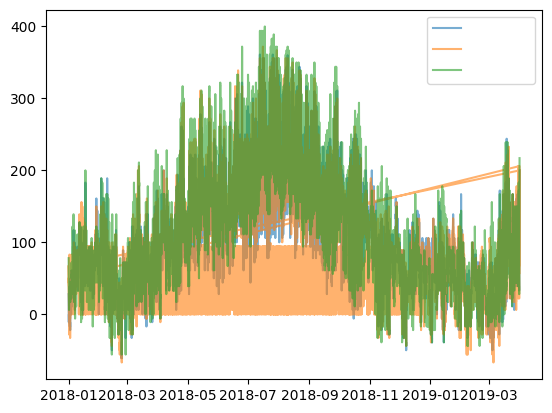

In [102]:
%pdb off
from datetime import datetime
for city in ['Eugene', 'Portland', 'Medford']:
    msk = state_df['city'] == city
    Tmsk = (datetime(2018,1,1) < state_df.index) & (state_df.index < datetime(2019,4,1))
    plt.plot(state_df['Temp'][Tmsk & msk], label=city, alpha=0.6)
plt.legend(['Eugene', 'Portland', 'Medford'])
plt.show()

In [ ]:

from util.get_weather_data import get_missing_data

In [ ]:
#get_missing_data(merge_df, start_year=2015, end_year=2021)

# ETL

Like the EBA data we want to load this into a PostgreSQL database.
Use Cases:

We are most likely selecting a bunch of data for one or two variables for a few stations at a time. 

Options:
1) Table per Station (feels messy)
    - adding extra stations is easy
    - Columns: time, temp, windspeed, cloudcover, precip-1hr
2) Table per variable, column per station
   - just need extra column
3) Meta table:  (should be the `air_merge_df.csv`)
   - station name, 
 wban,
 usaf
 lat
 long
 state
 city

## Historical Forecasts

The National Forecast Database saves day ahead forecasts (also at hourly resolution)
Recent data (2020/4 onwards) is available here:
https://registry.opendata.aws/noaa-ndfd/

An example of this data is here:
https://noaa-ndfd-pds.s3.amazonaws.com/wmo/temp/2020/04/16/YETZ98_KWBN_202004161748
The file name means what?  Five digit code gives type of series, KWBN is location/grid?
Then date of forecast, with half-hourly updates.

From `data/NDFD/NDFDelem_fullres_202206.xls` example, CONUS hourly forecast data has 
- YEUZ87 for legacy 1-3 day forecast, YEUZ97 for current 1-3 day forecasts.


https://vlab.noaa.gov/web/mdl/ndfd

- Can load it in python using `xarray`.
(Following https://docs.xarray.dev/en/stable/examples/ERA5-GRIB-example.html)

In keeping with the scale of the project, we can use the CONUS forecast data (pass it through a CNN to condense down, then dense layers)


In [94]:
!pip install xarray cfgrib

     |▏                               | 40 kB 3.0 MB/s eta 0:00:03

     |███                             | 614 kB 3.6 MB/s eta 0:00:02

     |████████▍                       | 1.7 MB 3.6 MB/s eta 0:00:02

     |██████████████▏                 | 2.8 MB 3.6 MB/s eta 0:00:01

     |█████████████████████           | 4.2 MB 3.6 MB/s eta 0:00:01

     |████████████████████████████▋   | 5.7 MB 3.6 MB/s eta 0:00:01

     |████████████████████████████████| 6.4 MB 3.6 MB/s 


  Installing build dependencies ... -

 \

 |

 /

 done


  Getting requirements to build wheel ... -

 done


    Preparing wheel metadata ... -

 done


     |████████████████████████▌       | 1.7 MB 47.9 MB/s eta 0:00:01

     |████████████████████████████████| 2.3 MB 47.9 MB/s 


 \

 done
  Created wheel for cfgrib: filename=cfgrib-0.9.10.3-py3-none-any.whl size=46704 sha256=afac40c4557c7c766b2887b503cea522568d8a5c45b551d678308446a5482b4a
  Stored in directory: /root/.cache/pip/wheels/27/28/8d/8b2e992d2d03933d9b1a04f20b7c157d22de6efabf3df4e48e


 done
  Created wheel for eccodes: filename=eccodes-1.5.1-py3-none-any.whl size=40337 sha256=655ade1d6e8022675fecf2e974e9b43eecde4cc7a1ade329588e60d72c60498c
  Stored in directory: /root/.cache/pip/wheels/2b/d3/0d/abe43ac0bbf57a2558173d95b1092b691680adf108d484437b


 done
  Created wheel for findlibs: filename=findlibs-0.0.2-py3-none-any.whl size=6549 sha256=054eb229ed73dc5b8d3b7ceeec3eae99f4bd337e35bb29ce83cfde346d2ab53b
  Stored in directory: /root/.cache/pip/wheels/16/e7/71/9deaff72c4a92f111cbc38631e0829b26398ee3599aec65b1b
Successfully built cfgrib eccodes findlibs


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [103]:
!python -m cfgrib selfcheck

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 185, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.8/runpy.py", line 144, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.8/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/usr/local/lib/python3.8/dist-packages/cfgrib/__init__.py", line 20, in <module>
    from .cfmessage import COMPUTED_KEYS
  File "/usr/local/lib/python3.8/dist-packages/cfgrib/cfmessage.py", line 29, in <module>
    from . import abc, messages
  File "/usr/local/lib/python3.8/dist-packages/cfgrib/messages.py", line 28, in <module>
    import eccodes  # type: ignore
  File "/usr/local/lib/python3.8/dist-packages/eccodes/__init__.py", line 13, in <module>
    from .eccodes import *  # noqa
  File "/usr/local/lib/python3.8/dist-packages/eccodes/eccodes.py", line 12, in <module>
    from gribap

In [97]:
import xarray as xr

In [92]:
!ls /tf/data/NDFD

NDFDelem_fullres_202206.xls  YEUZ87_KWBN_202302090535  filelist.txt


In [98]:
ds = xr.load_dataset("/tf/data/NDFD/YEUZ87_KWBN_202302090535", engine="cfgrib")

ValueError: unrecognized engine cfgrib must be one of: ['scipy', 'store']